In [284]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from google.colab import files
import numpy as np
import io

 trzebo wybrac plik "letters.data"

In [285]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['letters.data']), header=None)

Saving letters.data to letters (16).data


In [286]:
all_pixels = df.iloc[:, :35].values
all_outputs = df.iloc[:, 35:].values
my_pixels = np.array([])
my_outputs = np.array([])
# My set [6, 7, 11, 17, 18, 20, 21, 23, 24, 25]
example_set = [6, 7, 11, 17, 18, 20, 21, 23, 24, 25]
for id in example_set:
    my_pixels = np.append(my_pixels, all_pixels[id])
    outputs = np.array([])
    for id2 in example_set:
      outputs = np.append(outputs, all_outputs[id][id2])
    my_outputs = np.append(my_outputs, outputs)

my_pixels = my_pixels.reshape((-1, 35))
my_outputs = my_outputs.reshape((-1, 10))

Get my data set from letters.data

In [287]:
my_pixels

array([[-1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.],
       [ 1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
        -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
        -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.],
       [-1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.],


In [288]:
my_outputs

array([[ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

Outputs

In [289]:
class SLP(object):
    def __init__(self, eta=0.001, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        self.perceptrons = [Perceptron(eta0=self.eta, max_iter=self.n_iter, random_state=self.random_state) for _ in range(len(X))]
        for perceptron, outputs in zip(self.perceptrons, y):
            perceptron.fit(X, outputs)
        return self.perceptrons

    def predict(self, X):
        return [perceptron.predict(X) for perceptron in self.perceptrons]

    def misclassified(self, X, y):
        slp_out = np.array(self.predict(X))
        corr_out = np.array(y)
        mistake = np.sum(slp_out != corr_out)
        return mistake

    def show(self, X):
      fig, axes = plt.subplots(1, 10, figsize=(20,20))
      for i, ax in enumerate(axes.flatten()):
          image = X[i].reshape(7, 5)
          ax.imshow(image, cmap='gray_r')
          ax.axis('off')
      plt.show()



def damage(X,percent,seed = 1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*percent/100)
  
  for index_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1],count,replace = False))
    for index_pixel in order:
      result[index_example][index_pixel] *=-1

  return result


In [290]:
net = SLP()

In [291]:
damaged5 = damage(my_pixels ,5)
damaged15 = damage(my_pixels,15)
damaged40 = damage(my_pixels,40)

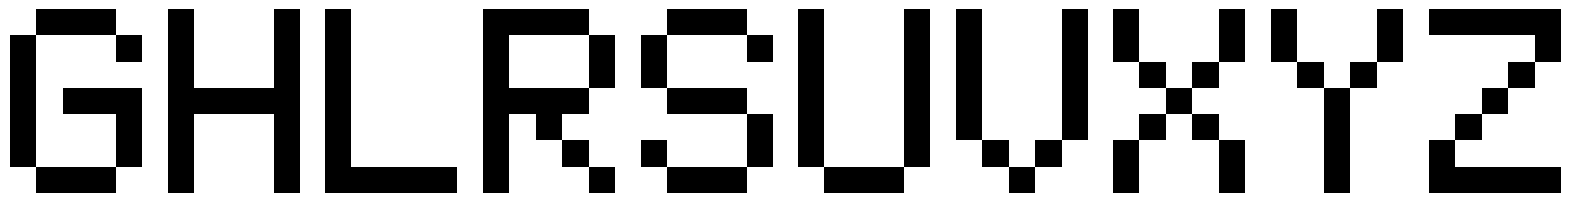

In [292]:
net.show(my_pixels)


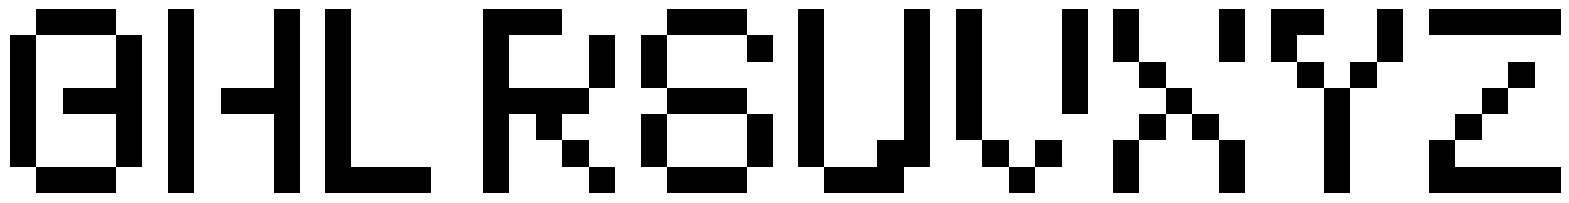

In [293]:
net.show(damaged5)

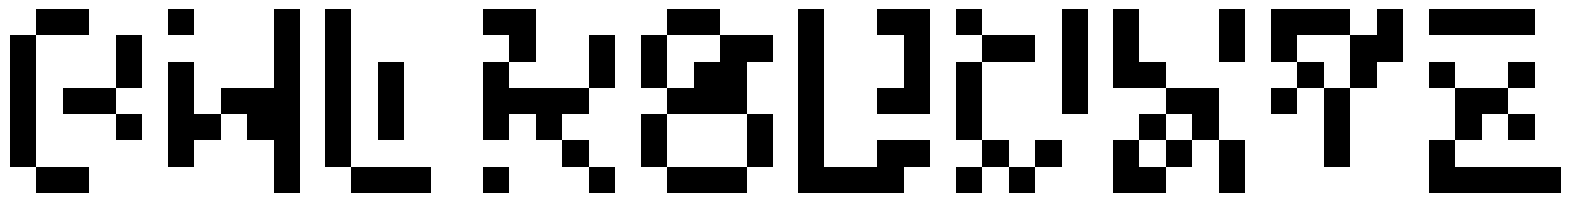

In [294]:
net.show(damaged15)

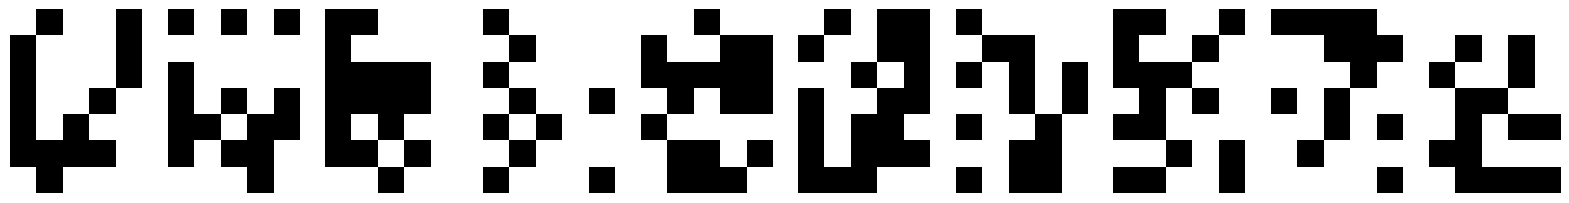

In [295]:
net.show(damaged40)

In [296]:
net.fit(my_pixels,my_outputs)

[Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1),
 Perceptron(eta0=0.001, max_iter=10, random_state=1)]

In [297]:
net.predict(my_pixels)

[array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.])]

In [298]:
net.misclassified(my_pixels,my_outputs)

0

In [299]:
net.predict(damaged5)

[array([ 1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.])]

In [300]:
net.misclassified(damaged5,my_outputs)

3

In [301]:
net.predict(damaged15)

[array([-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.]),
 array([-1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.]),
 array([-1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.])]

In [302]:
net.misclassified(damaged15,my_outputs)

9

In [303]:
net.predict(damaged40)

[array([-1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.]),
 array([-1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.]),
 array([-1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.]),
 array([ 1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1.]),
 array([-1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.]),
 array([-1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.]),
 array([-1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([ 1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.])]

In [304]:
net.misclassified(damaged40,my_outputs)

26